In [7]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [8]:
pickle_data = open(os.path.join(os.getcwd(), '..', 'data', 'processed', 'clean_data.pickle'), 'rb')
data = pickle.load(pickle_data)

In [9]:
cols = data.columns[1:]

First, I'll standardize the data using the StandardScaler class from sklearn. Standardization is extremely important for clustering since euclidean distance is often used as a distance measure between points/clusters. If the data is not standardized prior to performing clustering, features will contribute unequally to the end result. For my dataset, monetary features such as home value are on the order of 100,000, while percentages are on the order of 100. If using euclidean distances for clustering, the percentage features will have very little effect on the final result.

In [10]:
ss = StandardScaler()
data_ss = pd.DataFrame(ss.fit_transform(data[cols]), index=data.index, columns=cols)
data_ss.head()

,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,
48021950100,-0.312700,-0.986568,0.652318,-1.491379,-0.661901,1.226548
48021950200,-0.481692,-1.522989,-0.570963,-1.398232,-0.902080,0.795565
48021950300,-0.167987,-0.926236,0.317202,-1.221345,-0.485497,0.881334
48021950400,-0.260314,-0.456254,0.021801,-1.026959,-0.623461,1.235095
48021950600,-0.495846,-1.162868,0.831765,-1.444631,-0.791303,0.843208


Next I'll perform feature reduction using principal component analysis (PCA) for the purpose of visualizing the clustering results. Be reducing the dataset to the two principal components that explain the most amount of variance, I'll be able to create two-dimensional scatter plots of the data which are much easier for the human brain to process.

First let's see how much variance is explained by each principal component.

Explained Variance:
	[ 0.59930976  0.13426161  0.11502126  0.08095805  0.04631217  0.02413714]
Cumulative Explained Variance:
	[ 0.59930976  0.73357137  0.84859263  0.92955068  0.97586286  1.        ]


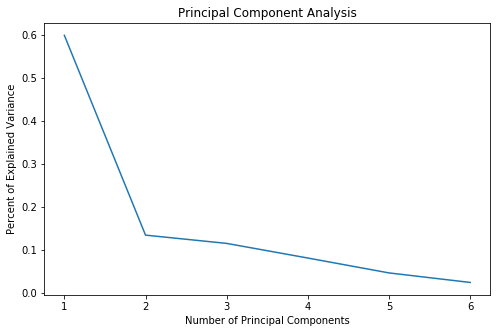

In [11]:
pca = PCA()
pca.fit(data_ss)
print(f'Explained Variance:\n\t{pca.explained_variance_ratio_}')
print(f'Cumulative Explained Variance:\n\t{pca.explained_variance_ratio_.cumsum()}')

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = ax.plot(range(1, 7), pca.explained_variance_ratio_)
_ = ax.set(xlabel='Number of Principal Components', 
           ylabel='Percent of Explained Variance',
           title='Principal Component Analysis')

Two principal components explains about 73% of the variance of the dataset. That's pretty good